The purpose of this notebook is to test the digital TV filter [1]. DTVF is attractive because it requires no stepsize parameter (analogous to learning rate in deep learning) and because my intuition suggests that it should have favorable isotropy properties. It also generalizes nicely to color and other vectorial image data. 

[1] "The Digital TV Filter and Nonlinear Denoising" by Tony F. Chan, Member, Stanley Osher, and Jianhong Shen in _IEEE Trans. Image Proc._, Feb. 2000

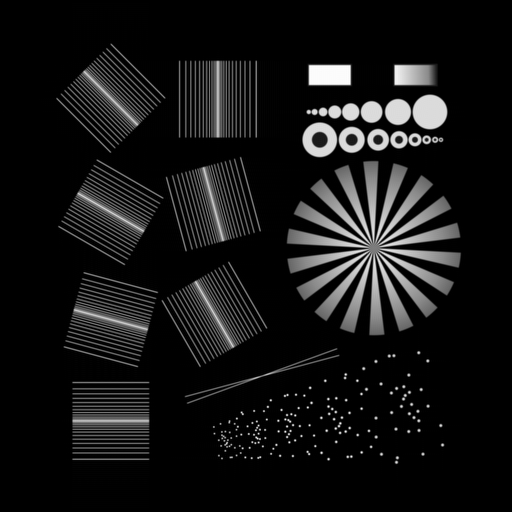

In [1]:
using Images, TestImages
names = ["resolution_test_512","cameraman"]
img = testimage(names[1])[1:1:end,1:1:end]

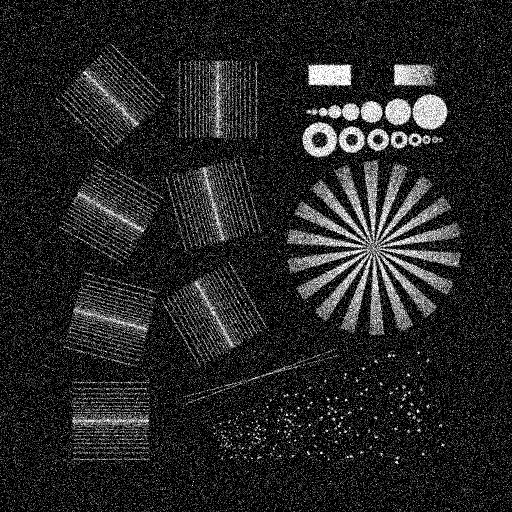

In [2]:
v = Float32.(img) 
v .+= 0.2randn(size(v))
Gray.(v)

In [3]:
include("tv.jl")

chan_osher_shen_tv

  1.776515 seconds (3.83 M allocations: 387.835 MiB, 6.87% gc time, 64.03% compilation time)


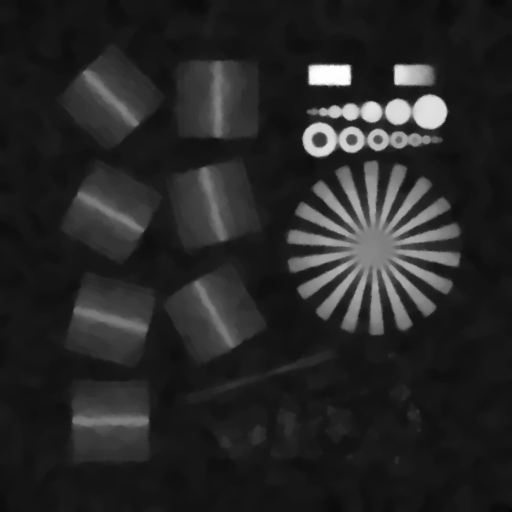

In [4]:
@time us = chan_osher_shen_tv(v, λ=3f0, itermax=100, devmin²=1f-8)
imadjustintensity(Gray.(us[:,:,end])) # display last image

Observe that noise is removed and larger structures maintain strong contrast and fairly sharp edges.  However, fine structures can be merged.